In [1]:
import dotenv
import os
import neptune

dotenv.load_dotenv()

import seaborn as sns

In [2]:

project = neptune.init_project(
    project=os.environ["NEPTUNE_PROJECT"],
    api_token=os.environ["NEPTUNE_API_TOKEN"],
    mode="read-only",
)

runs_table_df = project.fetch_runs_table().to_pandas()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/TML-Decoder/Decoder/


Fetching table...: 0 [00:00, ?/s]

In [3]:
runs_table_df

,sys/creation_time,sys/description,sys/failed,sys/group_tags,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,...,monitoring/fe22849d/stdout,monitoring/fe22849d/tid,monitoring/fe22849d/traceback,monitoring/ff121026/hostname,monitoring/ff121026/memory,monitoring/ff121026/pid,monitoring/ff121026/stderr,monitoring/ff121026/stdout,monitoring/ff121026/tid,monitoring/ff121026/traceback
0,2024-06-27 12:38:49.708,,False,,szklanka,DEC-505,2024-06-27 18:33:04.354,21254,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-06-27 12:24:28.695,,True,,basiekjusz-air.local,DEC-504,2024-06-27 14:10:26.711,104,Untitled,basiekjusz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-27 11:26:06.612,,False,,basiekjusz-air.local,DEC-503,2024-06-27 12:22:38.131,1865,Untitled,basiekjusz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-27 10:47:49.076,,False,,basiekjusz-air.local,DEC-502,2024-06-27 11:08:46.946,579,Untitled,basiekjusz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-27 10:41:22.945,,True,,basiekjusz-air.local,DEC-501,2024-06-27 10:47:39.672,377,Untitled,basiekjusz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2024-02-28 21:43:16.460,,True,NaN,zuomek,DEC-31,2024-02-28 21:43:17.846,2,Untitled,d.wisniewsk2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,2024-02-28 21:38:15.722,,True,NaN,zuomek,DEC-29,2024-02-28 21:38:46.539,31,Untitled,d.wisniewsk2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,2024-02-28 21:36:58.887,,True,NaN,zuomek,DEC-28,2024-02-28 21:36:59.488,1,Untitled,d.wisniewsk2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2024-06-25 15:44:51.300,NaN,False,,NaN,DEC-428,2024-06-25 15:44:51.300,0,DEC-428,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 1. Comparision of MCTS
#MCTSteps in sys/tags

mcts_df = runs_table_df[runs_table_df["sys/tags"].isin(["MCTSSteps"])]
mcts_df = mcts_df[mcts_df["parameters/encoder_name"] == "MiniLM"]
mcts_df

,sys/creation_time,sys/description,sys/failed,sys/group_tags,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,...,monitoring/fe22849d/stdout,monitoring/fe22849d/tid,monitoring/fe22849d/traceback,monitoring/ff121026/hostname,monitoring/ff121026/memory,monitoring/ff121026/pid,monitoring/ff121026/stderr,monitoring/ff121026/stdout,monitoring/ff121026/tid,monitoring/ff121026/traceback
74,2024-06-24 22:10:09.204,,False,NaN,szklanka,DEC-423,2024-06-25 09:37:16.287,37122,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2024-06-24 22:04:15.878,,False,NaN,szklanka,DEC-422,2024-06-25 09:47:09.336,38062,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2024-06-24 22:02:51.185,,False,NaN,szklanka,DEC-421,2024-06-25 09:51:06.805,38387,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2024-06-24 17:32:15.022,,False,NaN,szklanka,DEC-420,2024-06-24 22:09:59.933,16663,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2024-06-24 17:30:40.886,,False,NaN,szklanka,DEC-419,2024-06-24 22:04:07.789,16405,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2024-06-24 17:29:58.887,,False,NaN,szklanka,DEC-418,2024-06-24 22:02:42.936,16363,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2024-06-24 15:15:59.552,,False,NaN,szklanka,DEC-417,2024-06-24 17:32:06.448,8166,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,2024-06-24 15:12:25.197,,False,NaN,szklanka,DEC-416,2024-06-24 17:30:31.958,8286,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2024-06-24 15:09:54.154,,False,NaN,szklanka,DEC-415,2024-06-24 17:29:50.148,8395,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2024-06-24 14:02:52.980,,False,NaN,szklanka,DEC-414,2024-06-24 15:15:49.193,4376,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


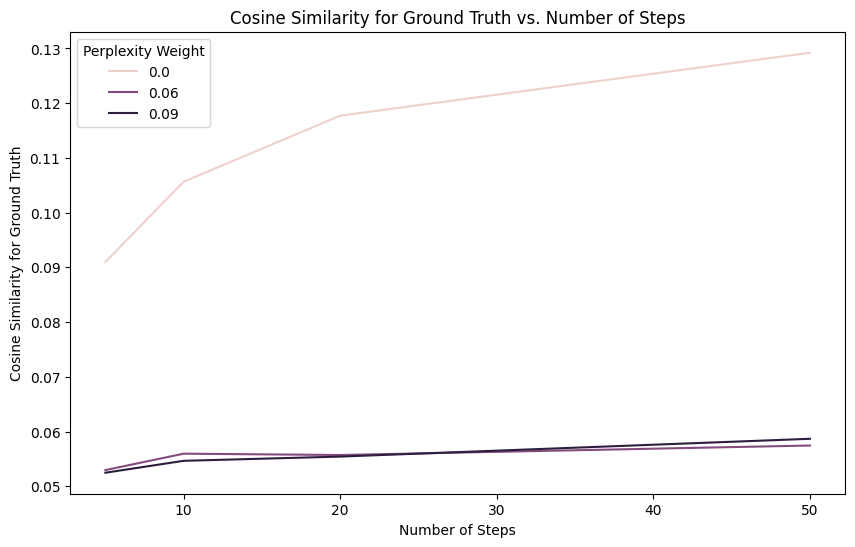

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `mcts_df` is your DataFrame containing the data
# Update the hue description and make colors lighter

palette = sns.color_palette("muted", n_colors=len(mcts_df["parameters/kwargs/perplexity_weight"].unique()))

plt.figure(figsize=(10, 6))
sns.lineplot(data=mcts_df, x="parameters/kwargs/iter_num", y="results/test/cosine_similarity/cos_sim_for_ground_truth", hue="parameters/kwargs/perplexity_weight")
plt.xlabel("Number of Steps")
plt.ylabel("Cosine Similarity for Ground Truth")
plt.title("Cosine Similarity for Ground Truth vs. Number of Steps")
plt.legend(title="Perplexity Weight")


plt.show()

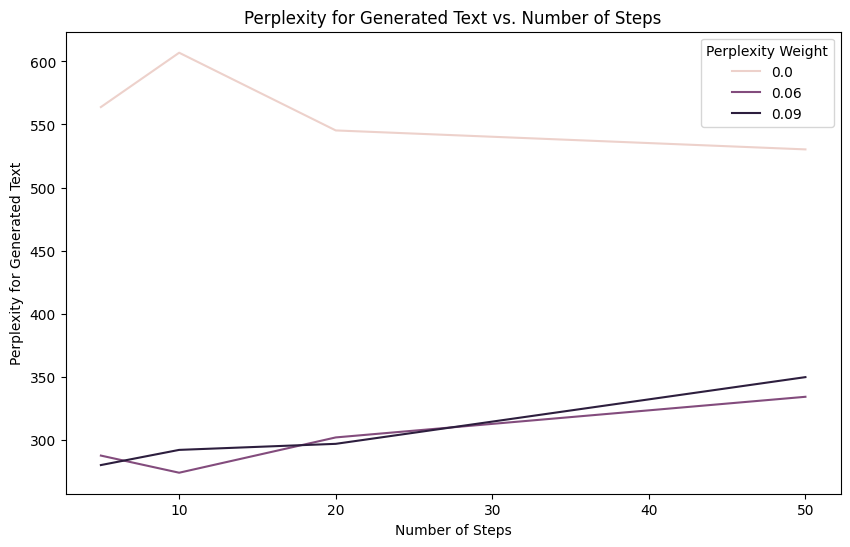

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `mcts_df` is your DataFrame containing the data
# Update the hue description and make colors lighter

palette = sns.color_palette("muted", n_colors=len(mcts_df["parameters/kwargs/perplexity_weight"].unique()))

plt.figure(figsize=(10, 6))
sns.lineplot(data=mcts_df, x="parameters/kwargs/iter_num", y="results/test/perplexity/avg_generated_perplexity", hue="parameters/kwargs/perplexity_weight")
plt.xlabel("Number of Steps")
plt.ylabel("Perplexity for Generated Text")
plt.title("Perplexity for Generated Text vs. Number of Steps")
plt.legend(title="Perplexity Weight")


plt.show()

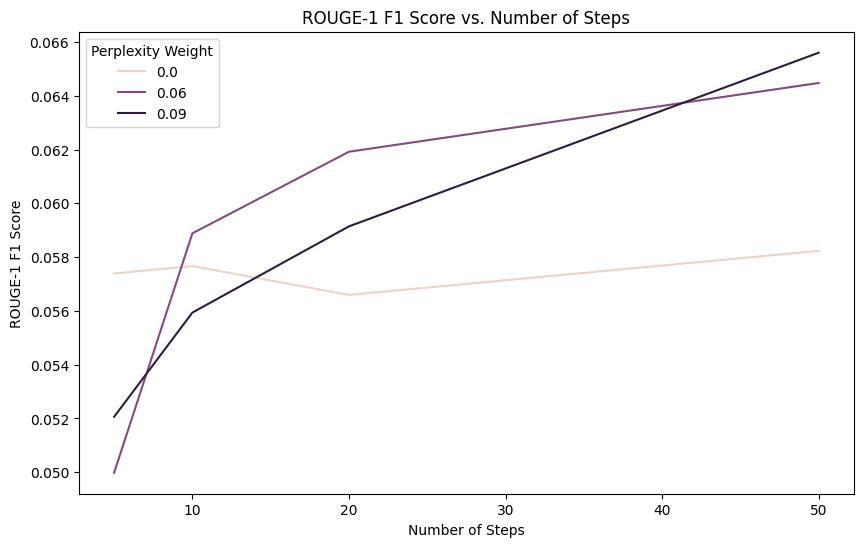

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `mcts_df` is your DataFrame containing the data
# Update the hue description and make colors lighter

palette = sns.color_palette("muted", n_colors=len(mcts_df["parameters/kwargs/perplexity_weight"].unique()))

plt.figure(figsize=(10, 6))
sns.lineplot(data=mcts_df, x="parameters/kwargs/iter_num", y="results/test/rouge_n/f1", hue="parameters/kwargs/perplexity_weight")
plt.xlabel("Number of Steps")
plt.ylabel("ROUGE-1 F1 Score")
plt.title("ROUGE-1 F1 Score vs. Number of Steps")
plt.legend(title="Perplexity Weight")


plt.show()

In [8]:
# 2. Comparision of different models and time
mcts_df = runs_table_df[runs_table_df["sys/tags"].isin(["MCTSSteps"])]
mcts_df = mcts_df[mcts_df["parameters/encoder_name"] == "gtr-base"]
mcts_df

,sys/creation_time,sys/description,sys/failed,sys/group_tags,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,...,monitoring/fe22849d/stdout,monitoring/fe22849d/tid,monitoring/fe22849d/traceback,monitoring/ff121026/hostname,monitoring/ff121026/memory,monitoring/ff121026/pid,monitoring/ff121026/stderr,monitoring/ff121026/stdout,monitoring/ff121026/tid,monitoring/ff121026/traceback
64,2024-06-26 01:57:52.519,,False,,szklanka,DEC-441,2024-06-26 14:49:46.404,46310,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2024-06-25 20:30:57.860,,False,,szklanka,DEC-440,2024-06-26 01:57:41.270,19602,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2024-06-25 17:22:24.277,,False,,szklanka,DEC-439,2024-06-25 20:30:47.543,11302,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2024-06-25 15:47:55.735,,False,,szklanka,DEC-434,2024-06-25 15:47:59.800,4,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2024-06-25 15:38:04.246,,False,,szklanka,DEC-425,2024-06-25 17:22:15.466,6251,Untitled,jfpio-mimuw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_32575/3201830334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beam_df['model'] = 'Beam'
/tmp/ipykernel_32575/3201830334.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vec_df['model'] = 'Vec2Text'


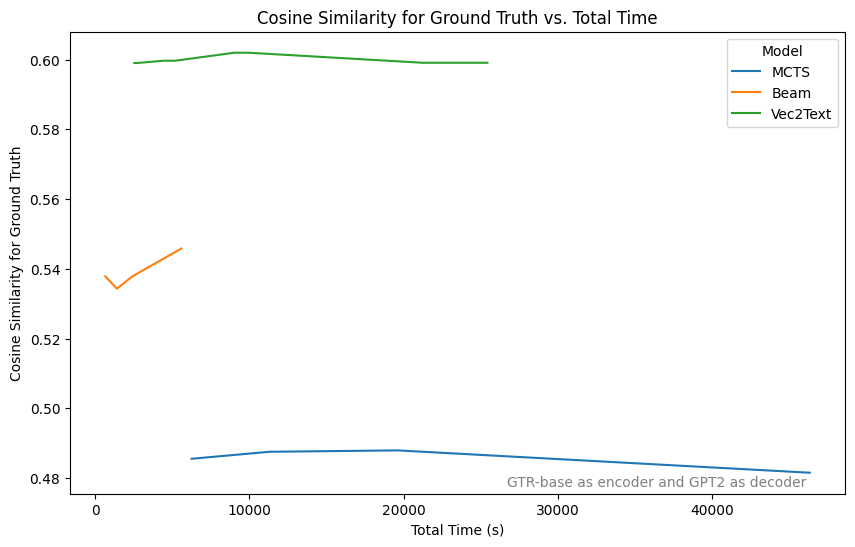

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 

# Filter data for different models
mcts_df = runs_table_df[runs_table_df["sys/tags"].isin(["MCTSSteps"])]
mcts_df = mcts_df[mcts_df["parameters/encoder_name"] == "gtr-base"]

beam_df = runs_table_df[runs_table_df["sys/tags"].isin(["BeamSteps"])]
vec_df = runs_table_df[runs_table_df["sys/tags"].isin(["Vec2TextSteps"])]

# Add a column to differentiate models
mcts_df['model'] = 'MCTS'
beam_df['model'] = 'Beam'
vec_df['model'] = 'Vec2Text'

# Combine the data into one DataFrame
combined_df = pd.concat([mcts_df, beam_df, vec_df])

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="total_time", y="results/test/cosine_similarity/cos_sim_for_ground_truth", hue="model")
plt.xlabel("Total Time (s)")
plt.ylabel("Cosine Similarity for Ground Truth")
plt.title("Cosine Similarity for Ground Truth vs. Total Time")
plt.legend(title="Model")

# Adding legend annotation about the encoder and decoder
plt.text(0.95, 0.01, 'GTR-base as encoder and GPT2 as decoder', 
         verticalalignment='bottom', horizontalalignment='right', 
         transform=plt.gca().transAxes,
         color='gray', fontsize=10)

plt.show()


In [10]:
vec_df['results/test/perplexity/avg_generated_perplexity']

0      162.250767
11     156.997561
30     154.657386
31     157.145369
104           NaN
106           NaN
108           NaN
110           NaN
Name: results/test/perplexity/avg_generated_perplexity, dtype: float64

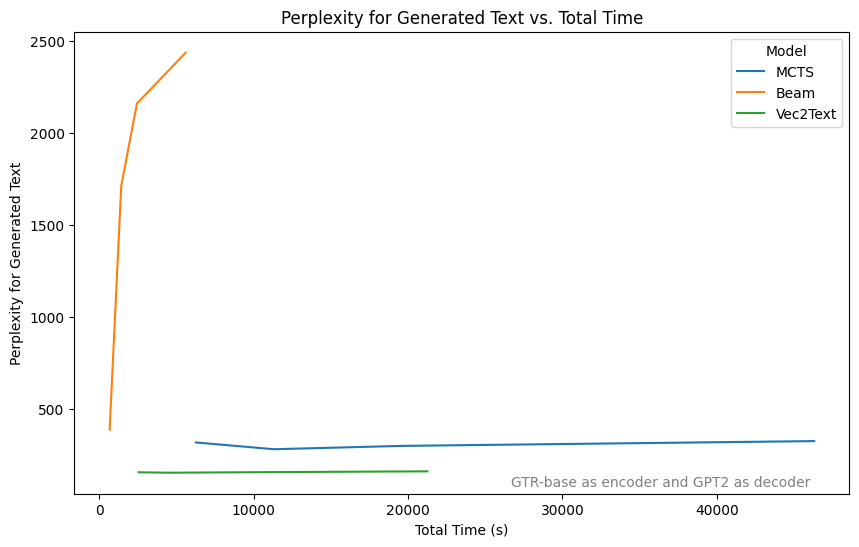

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="total_time", y="results/test/perplexity/avg_generated_perplexity", hue="model")
plt.xlabel("Total Time (s)")
plt.ylabel("Perplexity for Generated Text")
plt.title("Perplexity for Generated Text vs. Total Time")
plt.legend(title="Model")

# Adding legend annotation about the encoder and decoder
plt.text(0.95, 0.01, 'GTR-base as encoder and GPT2 as decoder', 
         verticalalignment='bottom', horizontalalignment='right', 
         transform=plt.gca().transAxes,
         color='gray', fontsize=10)

plt.show()

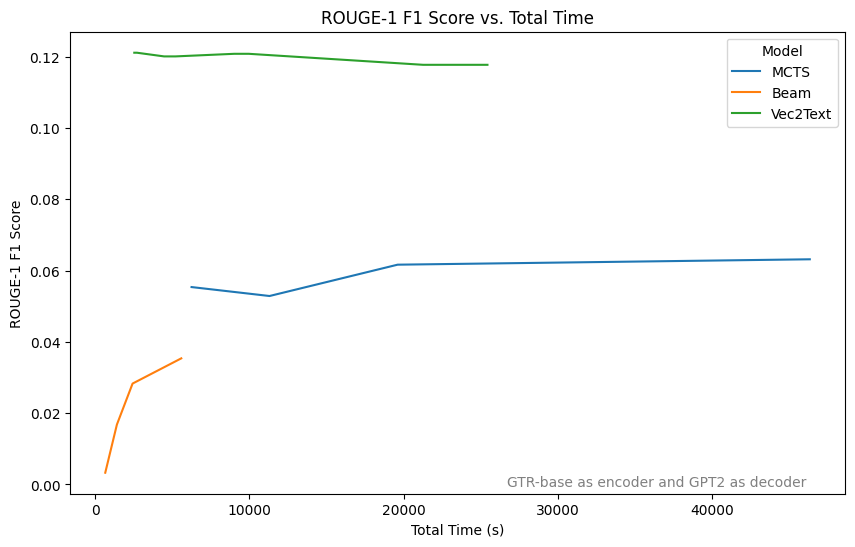

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="total_time", y="results/test/rouge_n/f1", hue="model")
plt.xlabel("Total Time (s)")
plt.ylabel("ROUGE-1 F1 Score")
plt.title("ROUGE-1 F1 Score vs. Total Time")
plt.legend(title="Model")

# Adding legend annotation about the encoder and decoder
plt.text(0.95, 0.01, 'GTR-base as encoder and GPT2 as decoder', 
         verticalalignment='bottom', horizontalalignment='right', 
         transform=plt.gca().transAxes,
         color='gray', fontsize=10)

plt.show()